# Problem Statement:

# Importing libraries

In [60]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import sweetviz as sv
import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [61]:
#load the dataset
data = pd.read_csv("/home/santosh/code_git/DSData/Telecom_customer_churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
#shape of the data
data.shape

(7043, 21)

In [63]:
#information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [64]:
#we can see that Totalcharges is a numerical variable but its given as object convert it
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors='coerce')

# Exploratory Data Analysis

In [65]:
#pandas describe function
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [66]:
#Getting report using pandas-profiling
pandas_profiling.ProfileReport(pd.read_csv('/home/santosh/code_git/DSData/Telecom_customer_churn.csv'))

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]


In [67]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [68]:
#we are lucky we dont have any null values in the dataset we can proceed further

## data preprcessing

In [69]:
#customerid is unnecessary
del data["customerID"]

In [70]:
data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3522,Male,0,Yes,Yes,37,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,677.05,No
3459,Female,0,Yes,Yes,30,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,25.10,789.55,No
5412,Male,1,Yes,No,61,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,No,One year,Yes,Bank transfer (automatic),85.55,5251.75,No


In [71]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [72]:
#We can convert them in the process but first we will continue with some visualizations
#lets create two listd one hanling the categorical data and another with numerical data
cat_cols = [col for col in data.columns if data[col].dtypes == 'object']
num_cols = [col for col in data.columns if data[col].dtypes != 'object']

#lets print them
print(cat_cols)
print()
print(num_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [73]:
#there is two no options we have to mix them for getting clearer visualization of data
for i in cat_cols:
    print(i)
    print(data[i].value_counts())
    print('==================================================================')

gender
Male      3555
Female    3488
Name: gender, dtype: int64
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: T

In [74]:
#lets mix them 
lines = {'No phone service' : 'No', 'No' : 'No', 'Yes' : 'Yes'}
data.MultipleLines = data.MultipleLines.apply(lambda x : lines[x])
internet = {'Fiber optic' : 'Yes', 'DSL' : 'Yes', 'No' : 'No'}
data.InternetService = data.InternetService.apply(lambda x : internet[x])
service = {'No internet service' : 'No', 'No' : 'No', 'Yes' :'yes'}
data.OnlineSecurity = data.OnlineSecurity.apply(lambda x: service[x])
data.OnlineBackup = data.OnlineBackup.apply(lambda x : service[x])
data.DeviceProtection = data.DeviceProtection.apply(lambda x: service[x])
data.TechSupport = data.TechSupport.apply(lambda x: service[x])
data.StreamingTV = data.StreamingTV.apply(lambda x : service[x])
data.StreamingMovies = data.StreamingMovies.apply(lambda x : service[x])
#we have replaced them lets continue forward

In [75]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,Yes,yes,No,yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,Yes,yes,yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,Yes,yes,No,yes,yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,Yes,yes,No,yes,yes,yes,yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Yes,No,yes,yes,No,yes,yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,Yes,yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Yes,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


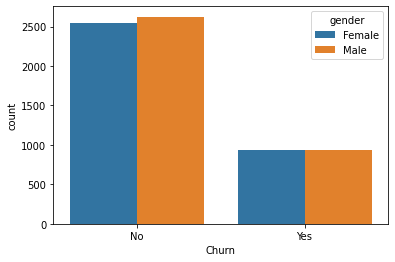

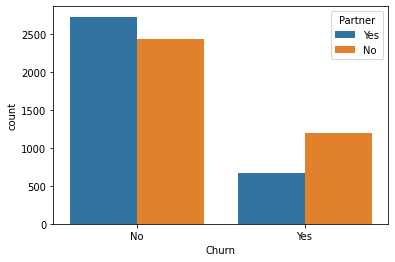

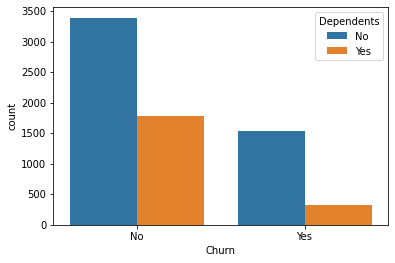

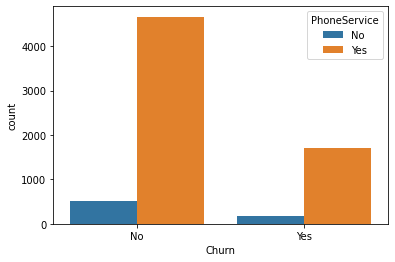

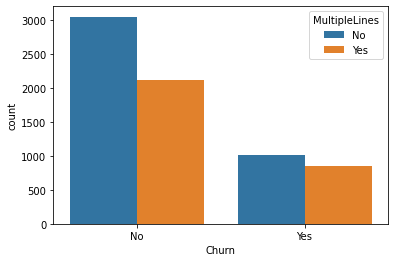

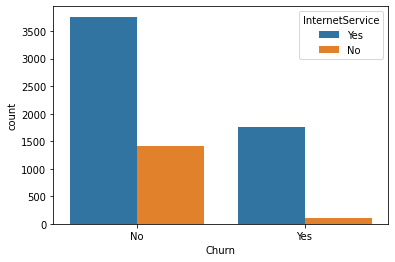

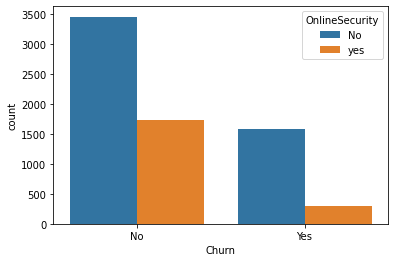

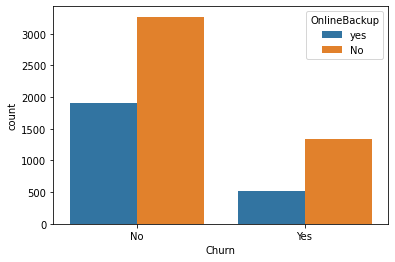

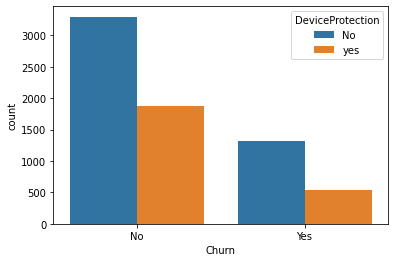

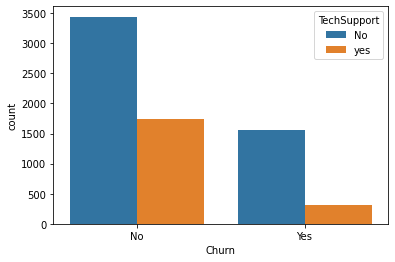

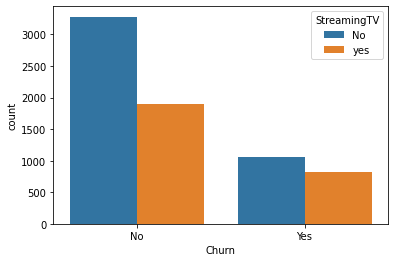

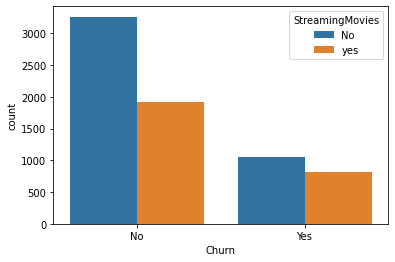

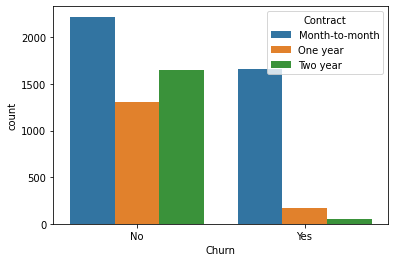

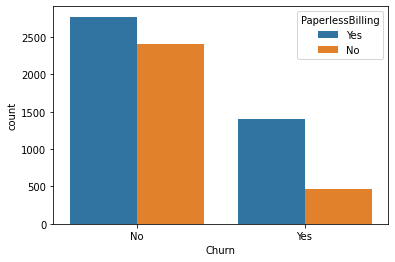

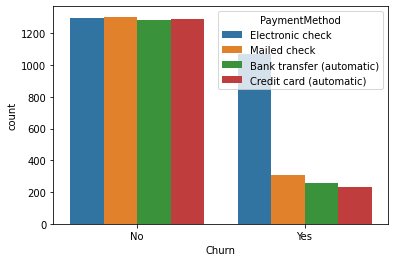

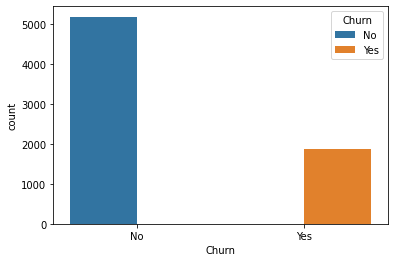

In [76]:
#lets try some visualization using this lists
for i in cat_cols:
    sns.countplot(data["Churn"], hue = i, data = data)
    plt.show()

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>]], dtype=object)

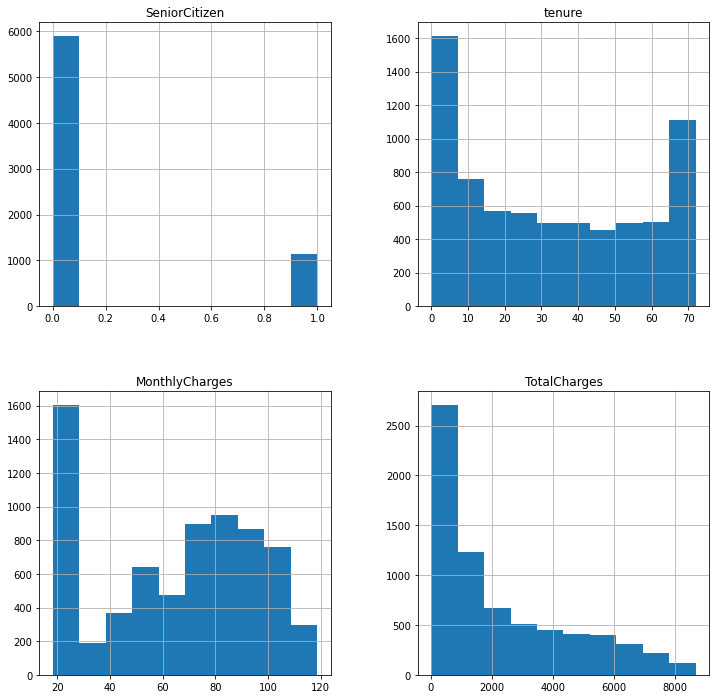

In [77]:
#plotting the hist bar of dataset
data.hist(figsize=(12,12),sharex=False)

# correlation

<AxesSubplot:>

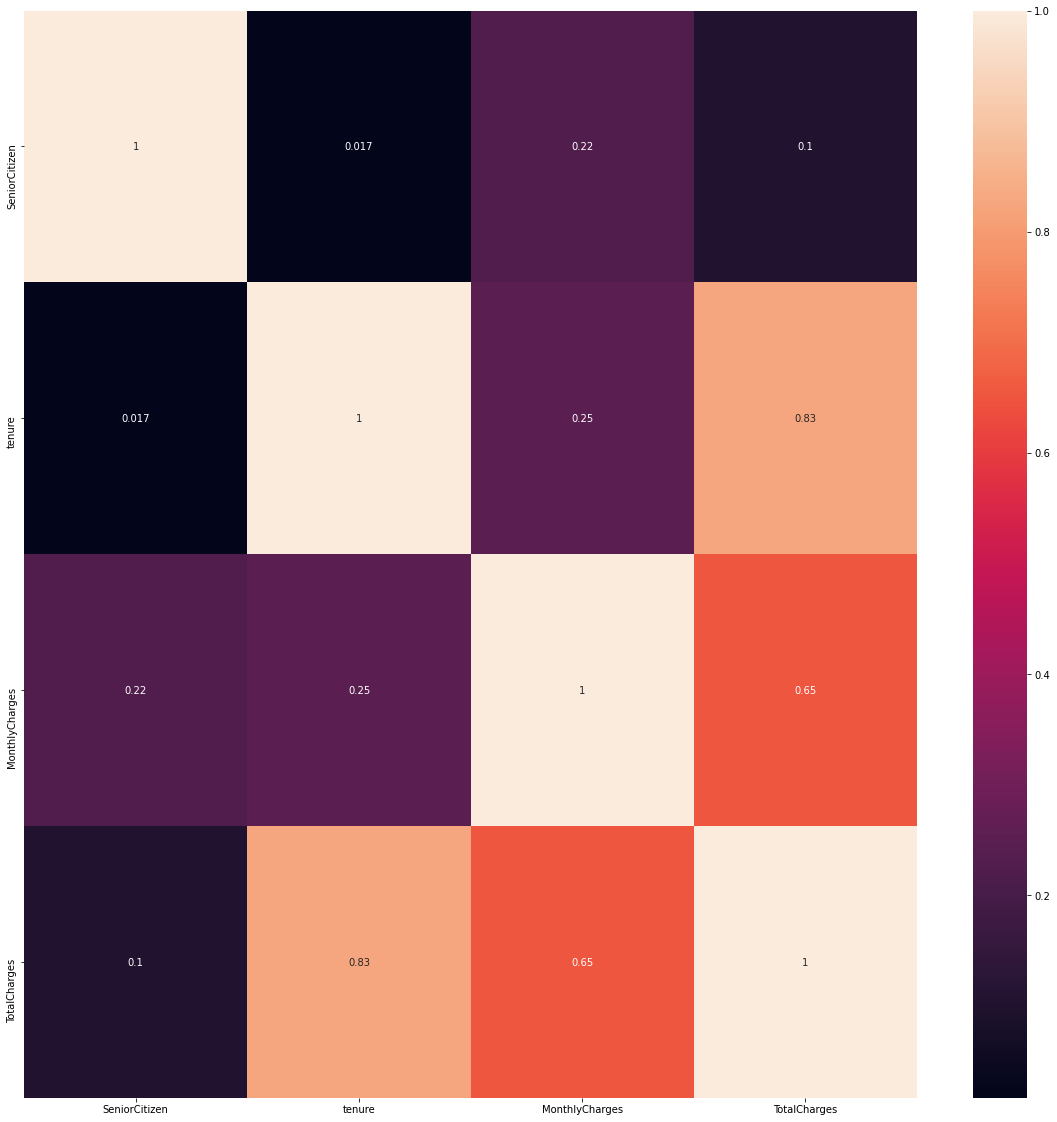

In [78]:
#creating heatmap for correlation
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot = True)

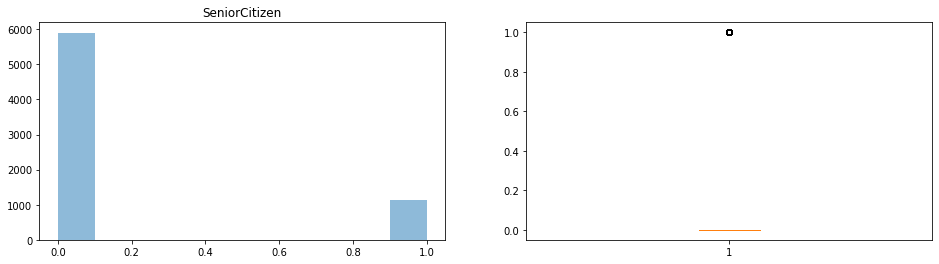

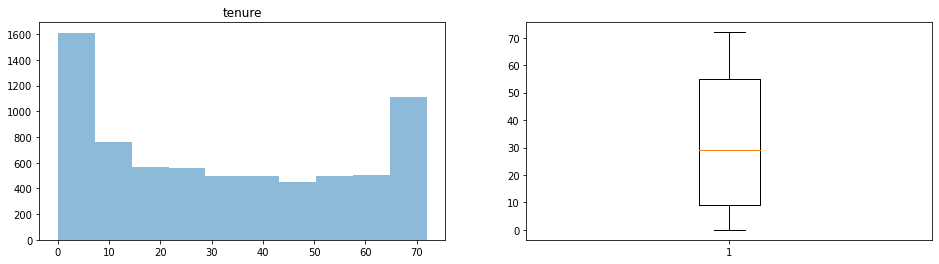

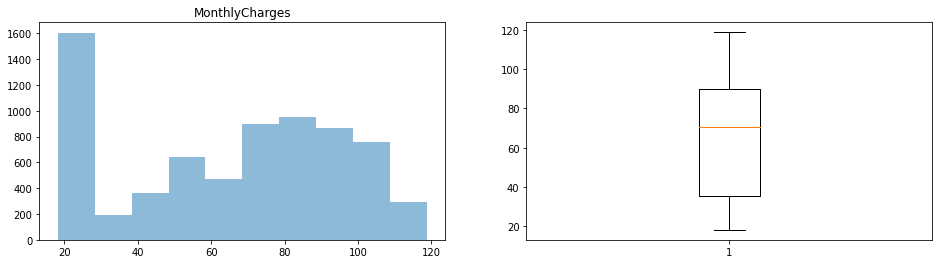

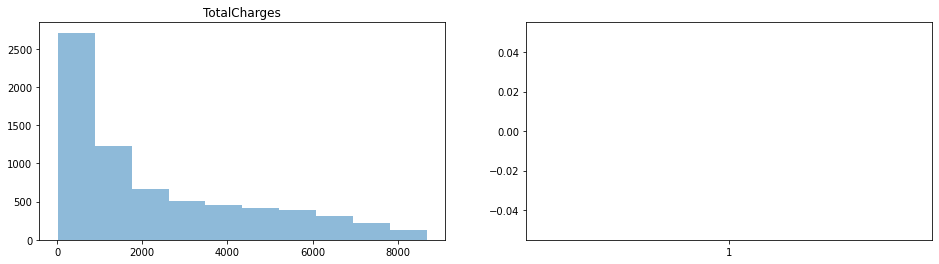

In [79]:
#In machine learning outlier detection is most important for building an accutate model to get good results
#lets create a function that deals with checking outliers
def plotingvariables(df, column):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.hist(df[column], alpha = 0.5)
    plt.title(column)

    plt.subplot(1,2,2)
    plt.boxplot(df[column])
    plt.show()
    
    
#creating the boxplots for the data
for i in num_cols:
    plotingvariables(data, i)

In [80]:
#there is a little bit skewnes in the data we have to adjust it

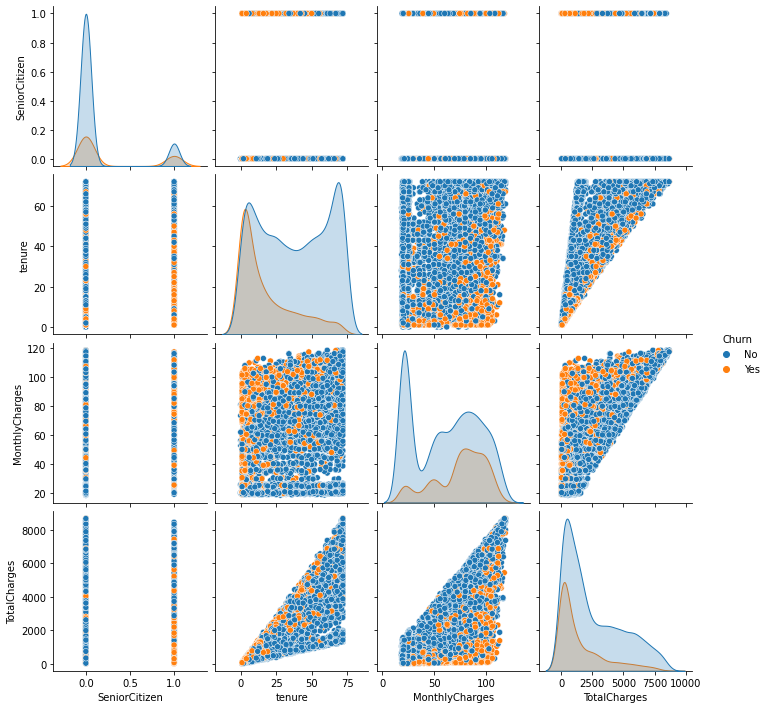

In [81]:
sns.pairplot(data, hue="Churn")

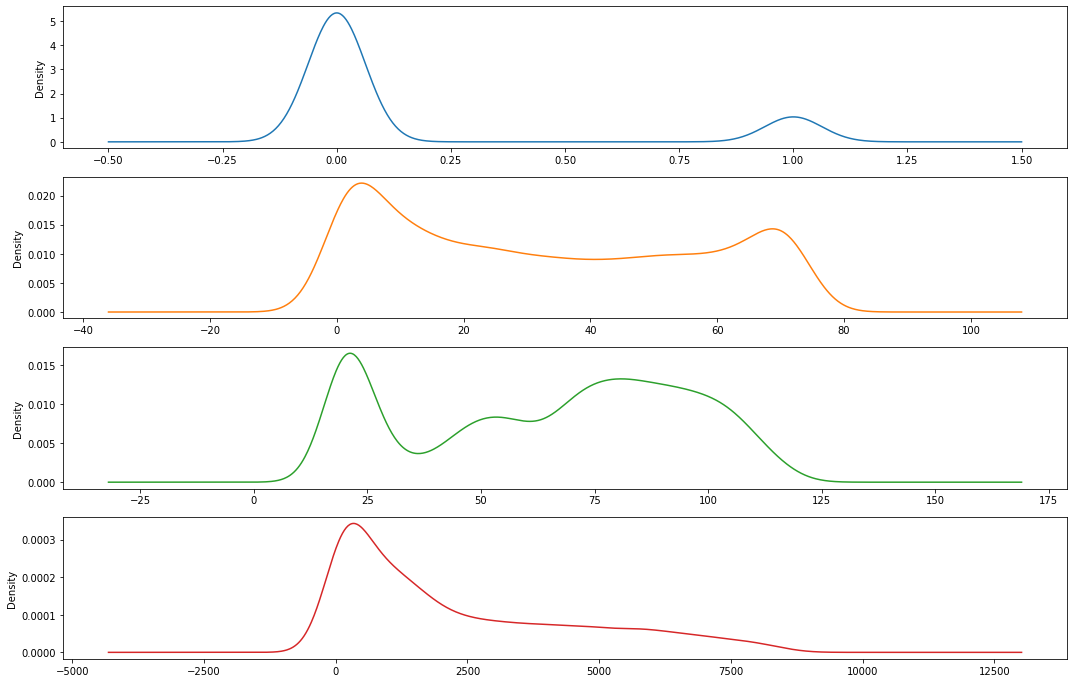

In [82]:
#Plotting the density function
data.plot(kind = 'density', subplots = True, sharex = False, legend = False, figsize = (18,12))
plt.show()

In [83]:
#we are going to replace the Yes or no in the data so that its will be easy in encoding them
gendermap = {'Female' : 0, 'Male' : 1 }

yesorno = {'Yes' : 0, 'No' : 1}

#there is one column multiple lines we have to handle them 
data.gender = data.gender.apply(lambda x : gendermap[x])

#Iam creating afunction which which applying we are applying map

def binary_mapping(features):
    for feature in features:
        data[feature] = data[feature].map(yesorno)
        
bin_fea = ['Partner','Dependents','PhoneService','MultipleLines',
           'InternetService','Churn']

binary_mapping(bin_fea)


In [84]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,1,1,0,No,yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1
1,1,0,1,1,34,0,1,0,yes,No,yes,No,No,No,One year,No,Mailed check,56.95,1889.50,1
2,1,0,1,1,2,0,1,0,yes,yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0
3,1,0,1,1,45,1,1,0,yes,No,yes,yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,1
4,0,0,1,1,2,0,1,0,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,24,0,0,0,yes,No,yes,yes,yes,yes,One year,Yes,Mailed check,84.80,1990.50,1
7039,0,0,0,0,72,0,0,0,No,yes,yes,No,yes,yes,One year,Yes,Credit card (automatic),103.20,7362.90,1
7040,0,0,0,0,11,1,1,0,yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,1
7041,1,1,0,1,4,0,0,0,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,0


In [85]:
for i in cat_cols:
    print(i)
    print(data[i].value_counts())
    print('==================================================')

gender
1    3555
0    3488
Name: gender, dtype: int64
Partner
1    3641
0    3402
Name: Partner, dtype: int64
Dependents
1    4933
0    2110
Name: Dependents, dtype: int64
PhoneService
0    6361
1     682
Name: PhoneService, dtype: int64
MultipleLines
1    4072
0    2971
Name: MultipleLines, dtype: int64
InternetService
0    5517
1    1526
Name: InternetService, dtype: int64
OnlineSecurity
No     5024
yes    2019
Name: OnlineSecurity, dtype: int64
OnlineBackup
No     4614
yes    2429
Name: OnlineBackup, dtype: int64
DeviceProtection
No     4621
yes    2422
Name: DeviceProtection, dtype: int64
TechSupport
No     4999
yes    2044
Name: TechSupport, dtype: int64
StreamingTV
No     4336
yes    2707
Name: StreamingTV, dtype: int64
StreamingMovies
No     4311
yes    2732
Name: StreamingMovies, dtype: int64
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
PaperlessBilling
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
Pay

In [86]:
data = pd.get_dummies(data)

In [87]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,TotalCharges,...,StreamingMovies_yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,1,1,0,29.85,29.85,...,0,1,0,0,0,1,0,0,1,0
1,1,0,1,1,34,0,1,0,56.95,1889.50,...,0,0,1,0,1,0,0,0,0,1
2,1,0,1,1,2,0,1,0,53.85,108.15,...,0,1,0,0,0,1,0,0,0,1
3,1,0,1,1,45,1,1,0,42.30,1840.75,...,0,0,1,0,1,0,1,0,0,0
4,0,0,1,1,2,0,1,0,70.70,151.65,...,0,1,0,0,0,1,0,0,1,0


In [88]:
data.isnull().sum()

gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
MultipleLines                               0
InternetService                             0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
OnlineSecurity_No                           0
OnlineSecurity_yes                          0
OnlineBackup_No                             0
OnlineBackup_yes                            0
DeviceProtection_No                         0
DeviceProtection_yes                        0
TechSupport_No                              0
TechSupport_yes                             0
StreamingTV_No                              0
StreamingTV_yes                             0
StreamingMovies_No                

In [89]:
#we can see there are 11 mising values in the dataset so replace them
data["TotalCharges"] = data["TotalCharges"].fillna(data.TotalCharges.mean(), inplace = True)

In [90]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,TotalCharges,...,StreamingMovies_yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,1,1,0,29.85,None,...,0,1,0,0,0,1,0,0,1,0
1,1,0,1,1,34,0,1,0,56.95,None,...,0,0,1,0,1,0,0,0,0,1
2,1,0,1,1,2,0,1,0,53.85,None,...,0,1,0,0,0,1,0,0,0,1
3,1,0,1,1,45,1,1,0,42.30,None,...,0,0,1,0,1,0,1,0,0,0
4,0,0,1,1,2,0,1,0,70.70,None,...,0,1,0,0,0,1,0,0,1,0


In [91]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.0,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
Partner,7043.0,0.516967,0.499748,0.00,0.0,1.00,1.00,1.00
Dependents,7043.0,0.700412,0.458110,0.00,0.0,1.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
PhoneService,7043.0,0.096834,0.295752,0.00,0.0,0.00,0.00,1.00
MultipleLines,7043.0,0.578163,0.493888,0.00,0.0,1.00,1.00,1.00
InternetService,7043.0,0.216669,0.412004,0.00,0.0,0.00,0.00,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
Churn,7043.0,0.734630,0.441561,0.00,0.0,1.00,1.00,1.00


# feature scaling And Model creation

In [92]:
#importing necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [93]:
#Lets divide the data into test and validation test
x = data.drop(['Churn', 'TotalCharges'], axis = 1)
y = data['Churn']
print(x.shape,y.shape)

(7043, 30) (7043,)


In [94]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4718, 30) (2325, 30) (4718,) (2325,)


In [95]:
new = pd.DataFrame(power_transform(x, method = 'yeo-johnson'), columns= x.columns)
x = new

In [96]:
#here i am creating pipeines of model i am using robust scalar and standardscalar

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rn = RandomForestClassifier()

In [97]:
pipeline_lr = Pipeline([
    ('robust1', RobustScaler()),
    ('scalar1', StandardScaler()),
    ('lr_classifier', LogisticRegression())
])

In [98]:
pipeline_dt = Pipeline([
    ('robust2', RobustScaler()),
    ('scalar2', StandardScaler()),
    ('dt_classifier', DecisionTreeClassifier())
])

In [99]:
pipeline_rn = Pipeline([
    ('robust3', RobustScaler()),
    ('scalar3', StandardScaler()),
    ('rn_classifier', RandomForestClassifier())
])

In [100]:
lr = LogisticRegression()
rn  = RandomForestClassifier()
dt = DecisionTreeClassifier()

In [101]:
#we are making list of pipelines
pipelist = [pipeline_lr, pipeline_dt, pipeline_rn]

In [102]:
best_accuracy = 0
best_classifier = 0
best_pipelines = ''

In [103]:
#here i am going to create a dict of piplines to make us easy to use
pipe_dict = {0 : 'LogisticRegression', 1 : 'DecisionTreeClassifier', 2 : 'RandomForestClassifier' }

#now i am fitting the model with train data
for pipe in pipelist:
    pipe.fit(x_train,y_train)
    

In [104]:
for i, model in enumerate(pipelist):
    print("{} accuracy is {}".format(pipe_dict[i], model.score(x_test,y_test)))
    prediction = model.predict(x_test)
    print("Classiscation report is \n\n {}".format(classification_report(y_test, prediction)))
    print("confusion_matrix is  \n\n {}".format(confusion_matrix(y_test, prediction)))
    print('==================================================================================')
    

LogisticRegression accuracy is 0.8025806451612904
Classiscation report is 

               precision    recall  f1-score   support

           0       0.65      0.55      0.59       613
           1       0.85      0.89      0.87      1712

    accuracy                           0.80      2325
   macro avg       0.75      0.72      0.73      2325
weighted avg       0.79      0.80      0.80      2325

confusion_matrix is  

 [[ 335  278]
 [ 181 1531]]
DecisionTreeClassifier accuracy is 0.723010752688172
Classiscation report is 

               precision    recall  f1-score   support

           0       0.48      0.49      0.48       613
           1       0.82      0.81      0.81      1712

    accuracy                           0.72      2325
   macro avg       0.65      0.65      0.65      2325
weighted avg       0.73      0.72      0.72      2325

confusion_matrix is  

 [[ 302  311]
 [ 333 1379]]
RandomForestClassifier accuracy is 0.7793548387096774
Classiscation report is 

       

In [105]:
#A we can see we got good scores predicting using these models,lets check the cross val scores of the models 

results = []
names = []

for i, model in enumerate(pipelist):
    kfold = KFold(n_splits=10, random_state=100)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(i)
    
    msg = '%s: %f, %f' % (pipe_dict[i], cv_results.mean(), cv_results.std())
    print(msg)

LogisticRegression: 0.808037, 0.007457
DecisionTreeClassifier: 0.729660, 0.016799
RandomForestClassifier: 0.788439, 0.013787


In [106]:
for i, model in enumerate(pipelist):
    if model.score(x_test,y_test) > best_accuracy:
        best_accuracy = model.score(x_test,y_test)
        best_classifier = i
        best_pipelines = model
        print("classifier with best accuracy is {}".format(pipe_dict[best_classifier]))

classifier with best accuracy is LogisticRegression


In [107]:
#these score are also pretty close to normal predictions. 
#so lets pick a good model and  them continue with hyper parameter tuning
#here i am picking up Logistic regression for hyperparameter tuning

# Hyperparameter Tuning

In [108]:
#logistic regreesion does not have any critical parameteters to do ,but adjusting them slightly will give us a chance 
#parameters

parameters = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
}

In [109]:
#creating an instance for gridsearch and fitting the model
grid1 = GridSearchCV(LogisticRegression(), parameters, cv = 5, verbose=0, n_jobs= -1) 
grid1.fit(x_train,y_train)# fitting the model

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None

In [110]:
#getting the beat parameters
grid1.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

score is 80.62738448495125
Classiscation report is 

               precision    recall  f1-score   support

           0       0.64      0.53      0.58       613
           1       0.84      0.89      0.87      1712

    accuracy                           0.80      2325
   macro avg       0.74      0.71      0.72      2325
weighted avg       0.79      0.80      0.79      2325

confusion_matrix is  

 [[ 327  286]
 [ 184 1528]]


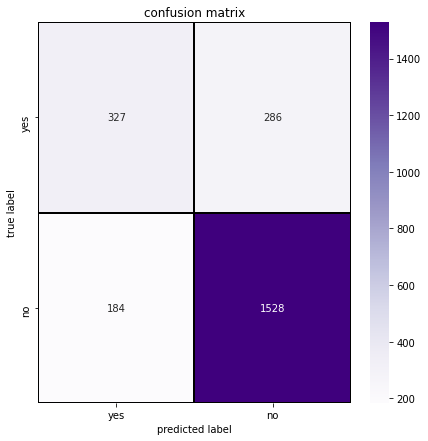

In [111]:
print("score is {}".format(grid1.score(x_train,y_train)*100))
predictions = grid1.predict(x_test)
print("Classiscation report is \n\n {}".format(classification_report(y_test, predictions)))
print("confusion_matrix is  \n\n {}".format(confusion_matrix(y_test, predictions)))


#ploting the confusion matrix
cm1 = confusion_matrix(y_test, predictions)
x_labe = ["yes", "no"]
y_labe = ["yes", "no"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm1, annot=True, linewidths=0.2, linecolor="black", fmt = ".0f", ax = ax, cmap="Purples", xticklabels=x_labe, yticklabels=y_labe)
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()

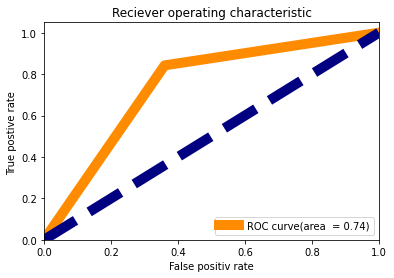

In [112]:
#ploting the auc-roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(predictions, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr ,tpr, color='darkorange', lw=10, label='ROC curve(area  = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color = 'navy', lw = 10, linestyle = '--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.05])
plt.xlabel("False positiv rate")
plt.ylabel("True postive rate ")
plt.title("Reciever operating characteristic")
plt.legend(loc = "lower right")
plt.show()

In [113]:
#normal predictio is slightly low than Hyperparameter tuning
#lets save the model

# saving the model

In [114]:
import joblib #importing module

joblib.dump(grid1, "Randommodel.obj")#saving the model

['Randommodel.obj']

In [115]:
mode = joblib.load("Randommodel.obj")#loading the model into a instance

# Conclusion

In [116]:
a = np.array(y_test)
mode.fit(x_train,y_train)
new_prediction = mode.predict(x_test)
submission = pd.DataFrame({'original': a, 'predictions' : new_prediction}, index=range(len(a)))

In [117]:
submission.sample(10)

,original,predictions
181,1,1
1174,0,1
630,1,1
1845,1,1
511,0,0
926,1,1
931,1,1
2201,1,1
1562,0,0
2228,0,0
